# Inferenza: introduzione e approccio bayesiano

Abbiamo visto finora diverse distribuzioni di probabilità, discrete o continue.

L'aspetto più interessante è che le distribuzioni dipendono da alcuni **parametri** che ne cambiano la forma.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

In [2]:
x = np.arange(-7,10, 0.01)

In [3]:
mu = np.arange(-5, 5, 0.25)
sigma = np.arange(0.1, 2.1, 0.05)

In [4]:
len(mu), len(sigma)

(40, 40)

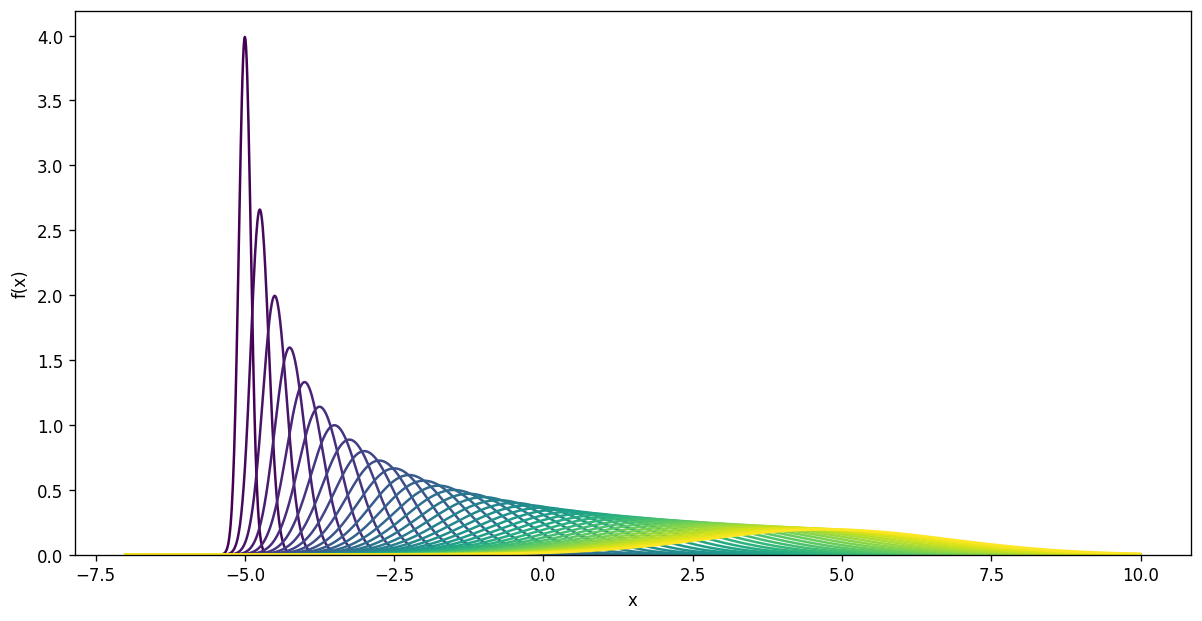

In [5]:
plt.figure(figsize=(12,6), dpi=120)
colors = np.linspace(0, 1, len(mu))
for m, s, c in zip(mu, sigma, colors):
    plt.plot(x, norm.pdf(x, loc=m, scale=s), color=plt.get_cmap('viridis')(c))
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Un aspetto molto interessante è ricavare informazioni sul **valore** di uno o più parametri in base ai dati osservati.

Il caso più favorevole è quello in cui una distribuzione è molto sensibile al valore di un parametro. 

Di seguito grafichiamo un numero di distribuzioni gaussiane con $\sigma=0.1$ e $\mu$ variabile.

Immaginiamo di osservare un'estrazione casuale di un valore $x$ secondo una delle gaussiane, delle quali però non conosciamo il valore di $\mu$. Se osserviamo $x=1.6$, possiamo *dire qualcosa* sul valore del parametro $\mu$?

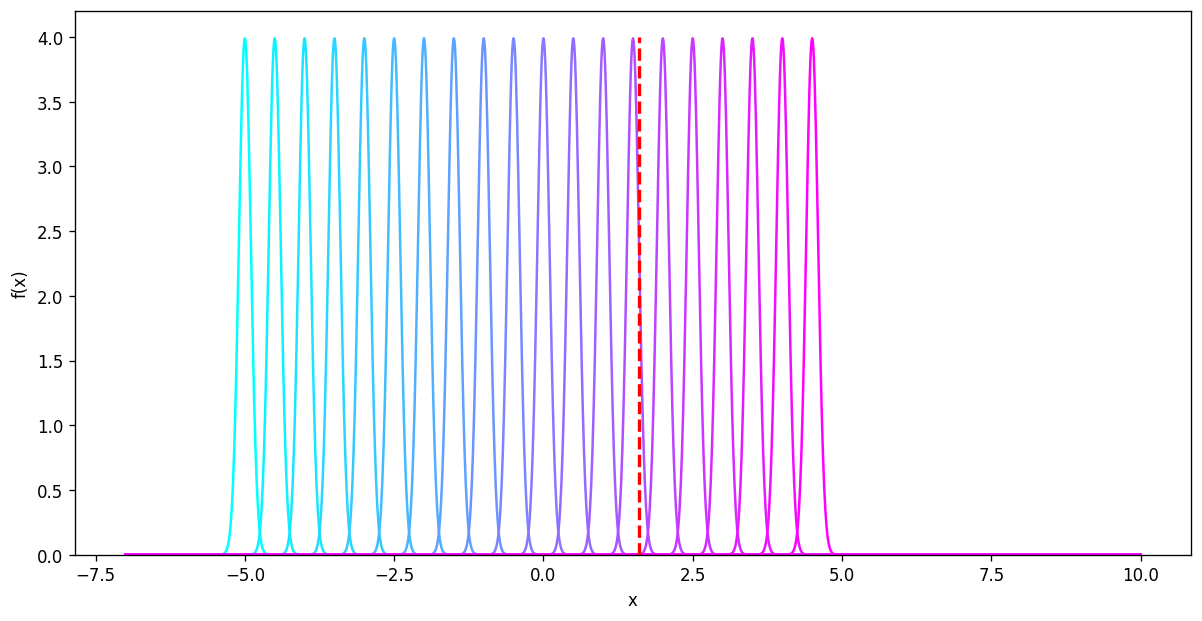

In [6]:
plt.figure(figsize=(12,6), dpi=120)
x0 = 1.6
mu = np.arange(-5, 5, 0.5)
colors = np.linspace(0, 1, len(mu))
for m, c in zip(mu, colors):
    plt.plot(x, norm.pdf(x, loc=m, scale=0.1), color=plt.cm.cool(c))
plt.plot([x0, x0], [0,4], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Il significato dell'espressione "dire qualcosa" è molto profondo, e merita una riflessione a parte.

# Definizione di inferenza e approcci alla definizione di probabilità

Abbiamo finora visto alcune definizioni di probabilità che rispettano gli assiomi di Kolmogorov:
* probabilità classica, basata sull'equiprobabilità di casi elementari
* probabilità intesa come frequenza di un campione finito (esempio: passeggeri del Titanic. Non è adatta a fenomeni casuali!)
* probabilità frequentista basata sul limite infinito della frequenza

Ha senso parlare di **probabilità che il parametro $\mu$ abbia un certo valore**?

L'approccio classico dà un significato alla probabilità associata ad un dispositivo dotato di simmetrie. Evidentemente, non si può applicare al valore di un parametro.

L'approccio frequentista dà un significato alla probabilità di un evento ripetibile. Non ha quindi senso parlare di probabilità di un valore di un parametro. A meno che non si immagini di avere diversi universi, ciascuno con un valore diverso del parametro, e di poterli esplorare tutti, cosa ovviamente impossibile.

Tuttavia, gli esseri umani ragionano spesso in termini di *probabilità* di eventi sconosciuti, come potrebbe essere il valore di un parametro. Esempi su cui gli umani tendono ad attribuire una *probabilità* sono quelli che abbiamo già citato come esempi di eventi per i quali non è possibile attruire una probabilità in senso frequentista:

* Probabilità che domani piova a Ginevra
* Probabilità che il Napoli vinca la prossima partita di campionato
* Probabilità che i dinosauri siano stati estinti da un asteroide
* Probabilità che la materia oscura sia fatta da particelle con massa > 1 TeV
* Probabilità che il Sars-Cov-2 sia stato prodotto artificialmente dall'uomo
* Probabilità che la Terra sia piatta

Possiamo trovare una definizione quantitativa di probabilità che abbia senso per eventi come i precedenti, e allo stesso tempo obbedisca alle leggi razionali di Kolmogorov?

Un approccio è quello di estendere il teorema di Bayes ad eventi che non siano estrazioni di variabili casuali.

# Inferenza Bayesiana

Secondo l'approccio bayesiano, si può definire una distribuzione di probabilità per un parametro incognito con un'estensione del teorema di Bayes.

Data una PDF che dipende dai un parametro $\theta$:

$f(x;\theta) = f(x | \theta)$

se osserviamo un valore $x_0$, la probabilità *a posteriori* di $\theta$ si può definire come: 

$\displaystyle p(\theta;x_0) = \frac{f(x_0;\theta)\,\pi(\theta)}{\int f(x_0;\theta^\prime)\,\pi(\theta^\prime)\,\mathrm{d}\theta^\prime}$

Serve prima di tutto definire la distribuzione *a priori* $\pi(\theta)$. Se riteniamo di essere ignoranti sul possibile valore di $\theta$, possiamo scegliere che $\pi(\theta)$ sia uniforme (ossia: costante) in un intervallo abbastanza largo di valori, al limite in tutto il dominio reale (<span style="color: red;">attenzione: in questo caso $\pi$ non può essere una funzione ordinaria, altrimenti il suo integrale non si potrebbe calcolare!</span>).

Se $\pi(\theta)$ è una costante, si semplifica numeratore e denominatore:

$\displaystyle p(\theta;x_0) = \frac{\displaystyle f(x_0;\theta)}{\displaystyle\int f(x_0;\theta^\prime)\,\mathrm{d}\theta^\prime}$

$p(\theta;x_0)$ è quindi semplicemente la *funzione di verosimiglianza* moltiplicata per un fattore di normalizzazione.

La funzione di verosimiglianza non è altro che la PDF interpretata come funzione del parametro incognito considerando un valore fissato della variabile casuale $x=x_0$.

## Inferenza bayesiana per una gaussiana

La distribuzione di Gauss è simmetrica rispetto allo scambio della variabile casuale $x$ e del suo valor medio $\mu$.

$\displaystyle g(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(x-\mu)^2/2\sigma^2}$

Quindi, la funzione di verosimiglianza e la PDF avranno la stessa espressione. Inoltre, il fattore di normalizzazione sarà uguale ad 1.

<span style="color:blue;">Da notare che abbiamo implicitamente assunto di conoscere il valore della deviazione standard $\sigma$.</span>

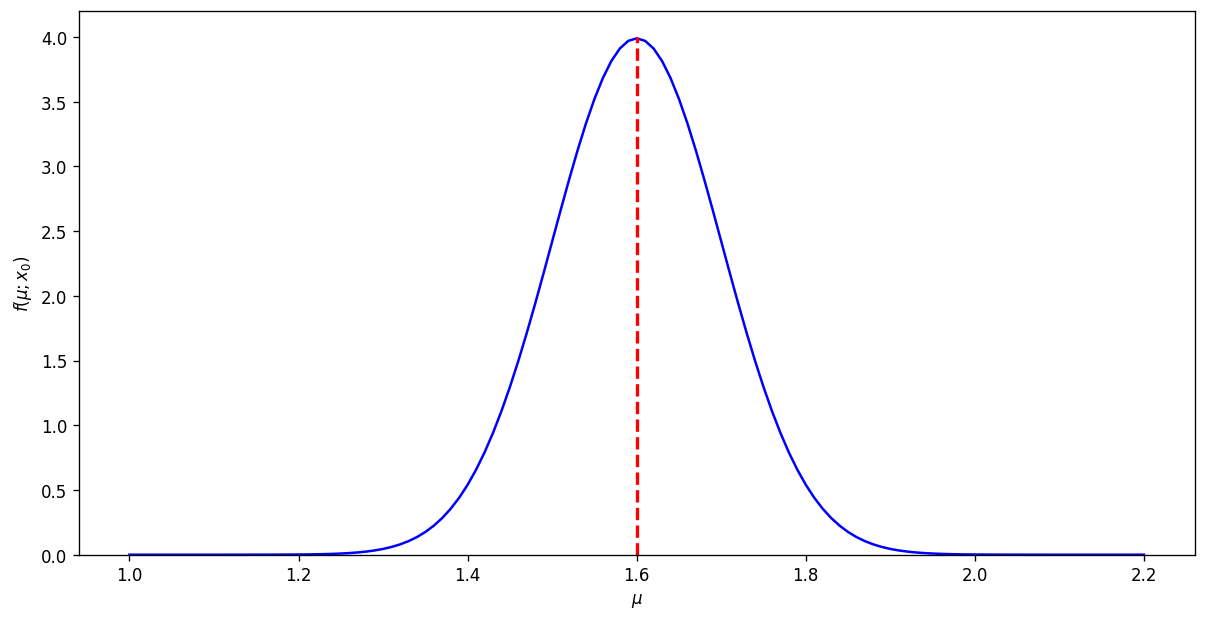

In [7]:
plt.figure(figsize=(12,6), dpi=120)
x0 = 1.6
x = np.arange(1,2.2,.01)
plt.plot(x, norm.pdf(x, loc=x0, scale=0.1), color='b')
plt.plot([x0, x0], [0,4], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$f(\mu;x_0)$')
plt.show()

Quindi possiamo subito dire che il valore più probabile di $\mu$ è $\hat{\mu}=x_0$. Anche il valor medio e la mediana sono uguali a $\mu$, e la deviazione standard vale $\sigma$.

$x_0$ è il **valore osservato**, oppure l'**evidenza**.

Possiamo a questo punto trovare intervalli intorno a $\mu=x_0$ che corrispondono al $68\%$ di probabilità:

$[\hat{\mu}-\sigma,\hat{\mu}+\sigma]$

Questo intervallo prende il nome di **intervallo di credibilità** o **CI** al 68%. Analogamente si definisce il CI al 95% come:

$[\hat{\mu}-2\sigma,\hat{\mu}+2\sigma]$

Alternativamente, si può scrivere:

$\mu = \hat{\mu} \pm \sigma$


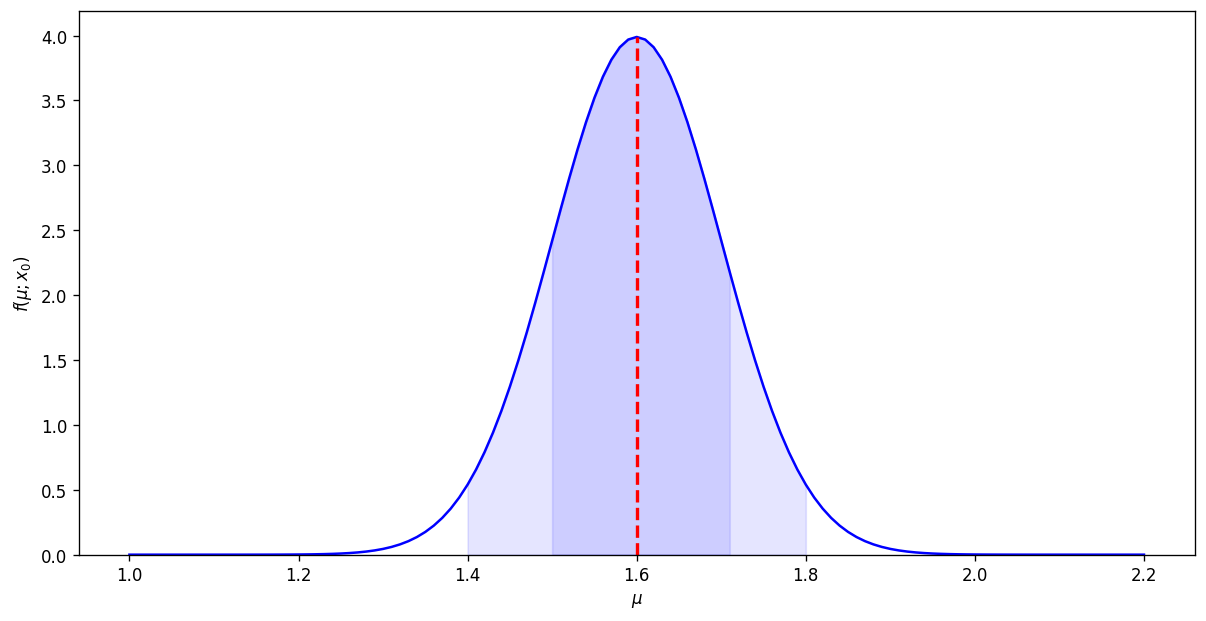

In [8]:
plt.figure(figsize=(12,6), dpi=120)
sigma=0.1
x0 = 1.6
x = np.arange(1,2.2,.01)
plt.plot(x, norm.pdf(x, loc=x0, scale=sigma), color='b')
x_1s = np.arange(x0-sigma, x0+sigma+.01, .01)
y_1s = norm.pdf(x_1s, loc=x0, scale=sigma)
plt.fill_between(x_1s, y_1s, alpha=0.1, color='blue')
x_2s = np.arange(x0-2*sigma, x0+2*sigma+.01, .01)
y_2s = norm.pdf(x_2s, loc=x0, scale=sigma)
plt.fill_between(x_2s, y_2s, alpha=0.1, color='blue')
plt.plot([x0, x0], [0,norm.pdf(x0, loc=x0, scale=sigma)], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$f(\mu;x_0)$')
plt.show()

## Inferenza bayesiana per una distribuzione di Poisson

Lo stesso approccio può essere usato nel caso di una distribuzione poissoniana:

$\displaystyle P(n; \nu) = \frac{\nu^n e^{-\nu}}{n!}$

Se **osserviamo** il valore $n=n_0$, possiamo scrivere, sempre assumendo $\pi(\nu)$ costante:

$\displaystyle P(\nu; n_0) = \frac{\displaystyle{\nu^{n_0} e^{-\nu}}/{n_0!}}{\displaystyle\int_0^{\infty} {\nu^{\prime n_0} e^{-\nu^\prime}}/{n_0!}\,\mathrm{d}\nu^\prime}$

<a href="https://mathworld.wolfram.com/GammaFunction.html">Si può dimostrare</a> che il denominatore vale 1 perché:

$\displaystyle \int_0^{\infty} {\nu^{n} e^{-\nu}}\,\mathrm{d}\nu= n!$

Il **valore più probabile**, si può dimostrare analiticamente, è $\nu=\hat{\nu}=n_0$.

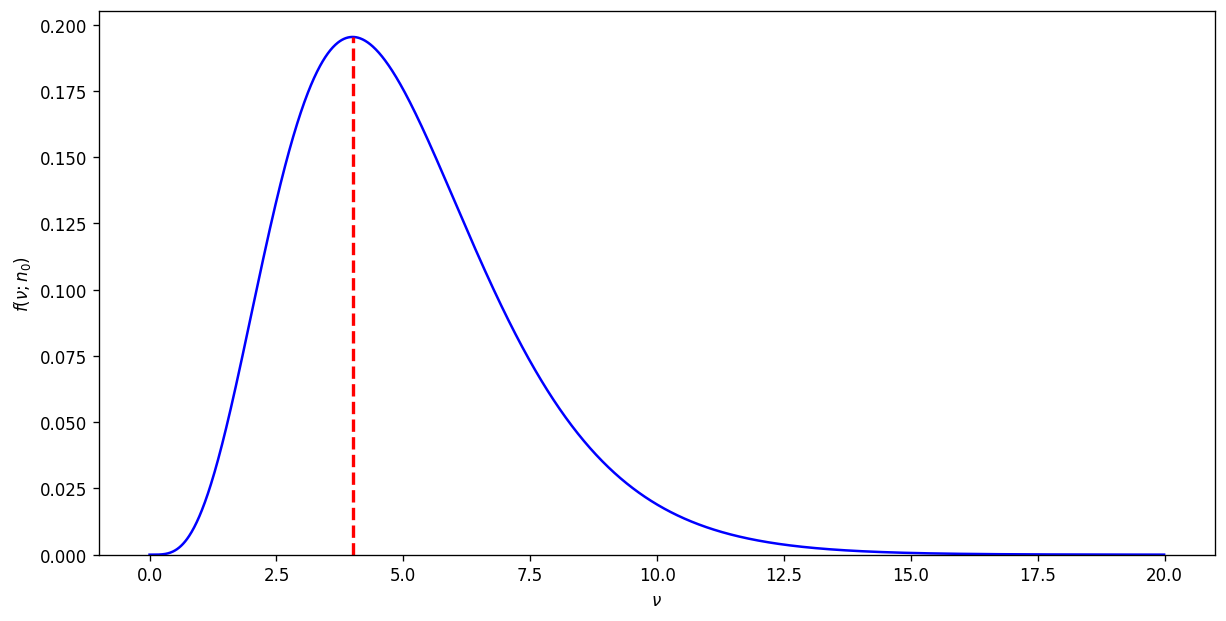

In [9]:
from scipy.stats import poisson

plt.figure(figsize=(12,6), dpi=120)
n0 = 4
x = np.arange(0,20,0.01)
plt.plot(x, poisson.pmf(n0, x), color='b')
plt.plot([n0, n0], [0,poisson.pmf(n0, n0)], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel(r'$\nu$')
plt.ylabel(r'$f(\nu;n_0)$')
plt.show()

A questo punto, definire l'intervallo di credibilità non è ovvio: deve essere centrato intorno al valore più probabile?

Vediamo alcuni approcci, nessuno dei quali va considerato migliore di altri.

### 1. Intervallo con aree uguali delle code a sinistra e destra rispetto al valore centrale

Dedfiniamo $\alpha=(1-0.68)$, e troviamo i due valori $x_1$ e $x_2$ tali che:

$\displaystyle \int_0^{x_1} P(\nu;n_0)\,\mathrm{d}\nu = \frac{\alpha}{2}$

$\displaystyle \int_{x_2}^{\infty} P(\nu;n_0)\,\mathrm{d}\nu = \frac{\alpha}{2}$

In [10]:
import scipy.integrate as integrate
from scipy import optimize
def area1(x1):
    return integrate.quad(lambda x: poisson.pmf(n0, x), 0, x1)[0]
def area2(x2):
    return integrate.quad(lambda x: poisson.pmf(n0, x), x2, 20)[0]
alpha=(1-0.6823)

In [11]:
x1 = optimize.root(lambda x: area1(x)-alpha/2, 0.1).x[0]
x2 = optimize.root(lambda x: area2(x)-alpha/2, 10).x[0]

In [12]:
print("CI({:.2%}) = [{:.2f}, {:.2f}]".format(1-alpha,x1, x2))

CI(68.23%) = [2.84, 7.16]


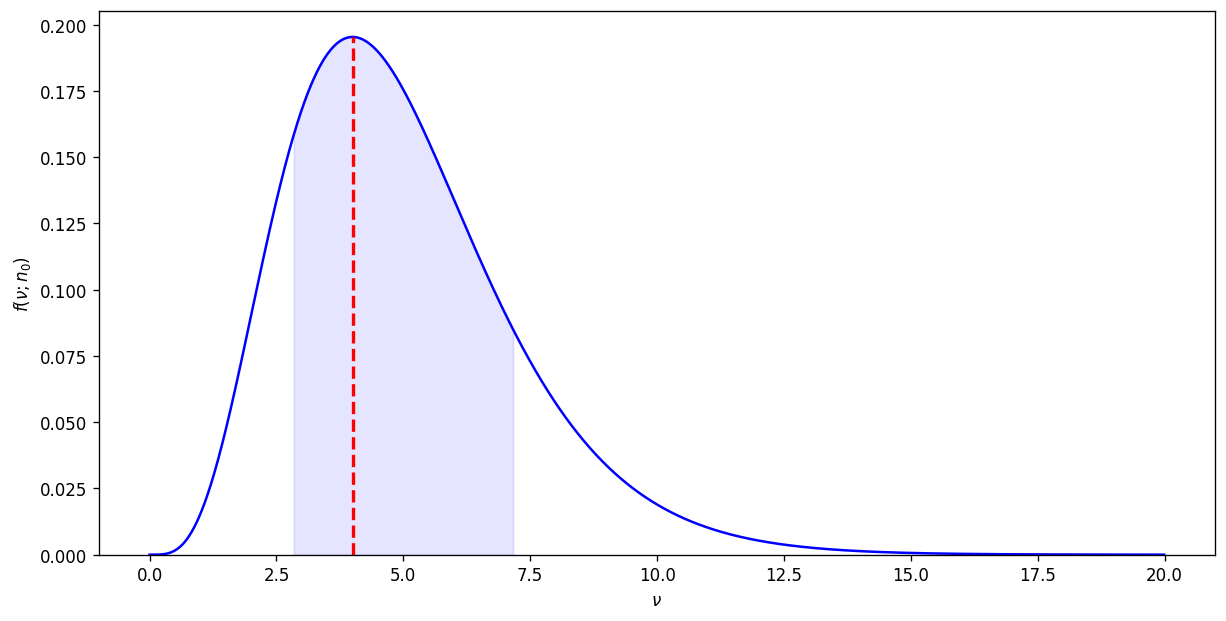

In [13]:
plt.figure(figsize=(12,6), dpi=120)
n0 = 4
x = np.arange(0,20,0.01)
plt.plot(x, poisson.pmf(n0, x), color='b')
plt.plot([n0, n0], [0,poisson.pmf(n0, n0)], color='red', linewidth=2, linestyle='--')
x_1s = np.arange(x1, x2+.01, .01)
y_1s = poisson.pmf(n0, x_1s)
plt.fill_between(x_1s, y_1s, alpha=0.1, color='blue')
plt.ylim(bottom=0)
plt.xlabel(r'$\nu$')
plt.ylabel(r'$f(\nu;n_0)$')
plt.show()

Da notare: l'intervallo è asimmetrico. Volendolo scrivere come:

$\nu = \hat{\nu}{\,\,}^{+\sigma_+}_{-\sigma_-}$

In [14]:
s1,s2 = n0-x1,x2-n0
print("ν = {:.2f} +{:.2f} / -{:.2f}".format(n0, s2, s1))
print("I = ", s1+s2)

ν = 4.00 +3.16 / -1.16
I =  4.31872564592808


# Approfondimenti sull'inferenza bayesiana

Come stimare una probabilità con l'inferenza bayesiana:
* Video: [Probabilities of probabilities | 1. Binomial distributions](https://youtu.be/8idr1WZ1A7Q) (12'33") con un'introduzione alla distribuzione binomiale
* Video: [Probabilities of probabilities | 2. Why “probability of 0” does not mean “impossible”](https://youtu.be/ZA4JkHKZM50) (10'00") con un'introduzione alle distribuzioni di probabilità continue
* *Manca il 3° video della serie* che dovrebbe parlare della distribuzione beta come risultato dell'inferenza bayesiana. Sarà il testo dell'ultimo esercizio di seguito.

## Uso del MCMC per l'inferenza bayesiana

Nella pratica, l'inferenza bayesiana consiste nel calcolo di un integrale:

$\displaystyle f(\theta|x) = \frac{f(x|\theta)\,\pi(\theta)}{\int f(x|\theta^\prime)\,\pi(\theta^\prime)\,\mathrm{d}\theta^\prime}$

Il denominatore è semplicemente un termine di normalizzazione. Se generiamo con il metodo Monte Carlo una sequenza di valori $\theta^{(1)},\cdots, \theta^{(N)}$, con $N$ possibilmente molto grande, la distribuzione dei valori di questo campione finito avrà, approssimativamente, una distribuzione vicina a $f(\theta|x)$

Nella generazione Monte Carlo, in particolare con il metodo di Metropolis Hastings, non è necessario specificare il ternine di normalizzazione della funzione che si usa per la generazione della sequenza casuale. In pratica, basta speficare il prodotto della funzione di verosimiglianza per la distribuzione a priori:

$f(\theta|x) \propto f(x|\theta)\,\pi(\theta)$

### Parametri multipli

Il caso in cui il metodo Monte Carlo risulta più vantaggioso è quando ci sono più parametri incogniti nel problema di inferenza. La distribuzione a posteriori sarà una PDF a più dimensioni dell'insieme dei parametri:

$f(\theta_1,\cdots,\theta_k|x) \propto f(x|\theta_1,\cdots,\theta_k)\,\pi(\theta_1,\cdots,\theta_k)$

Sopra $x$ può rappresentare un set di dati, non solo un singolo valore.

I genere, solo uno o pochi tra i parametri sarà un *parametro di interesse*. Immaginiamo che sia $\theta_1$. La distribuzione marginale per $\theta_1$ si ottiene come:

$\displaystyle f_1(\theta_1|x) = \int f(\theta_1,\cdots,\theta_k|x)\,\mathrm{d}\theta_2\cdots\mathrm{d}\theta_k$

Nella pratica, avendo la sequenza generata con il Monte Carlo: $\left(\theta^{(1)}_1,\cdots,\theta^{(1)}_k\right),\cdots, \left(\theta^{(N)}_1,\cdots,\theta^{(N)}_k\right)$. Basterà produrre la distribuzione della prima variabile: 

$\theta^{(1)}_1,\cdots, \theta^{(N)}_1$

Eventualmente, si potrà interpolare la distribuzione discreta per ottenere una PDF continua.

# Approfondimenti sulle MCMC per l'analisi bayesiana:
* [MCMC sampling for dummies](https://twiecki.io/blog/2015/11/10/mcmc-sampling/).
* [From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings, in python](https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a)
* [Markov Chain Monte Carlo (MCMC)](https://people.duke.edu/~ccc14/sta-663/MCMC.html) for Bayesian analysis.
* [PyMC3](https://juanitorduz.github.io/intro_pymc3/): un pacchetto avanzato che implementa metodi statistici con metodi Monte Carlo, in particolare MCMC. Chi vuole approfondire può provare a seguire la documentazione ed i tutorial, ma non lo studieremo durante questo corso.

# Spunti per esercizi
Trovare, per la distribuzione poissoniana considerata sopra, i seguenti intervalli di credibilità:

### Esercizio 1

* intervallo simmetrico intorno a $\hat{\nu}$ con area pari al 68%

ν = 4.00 ± 2.09
I =  4.183667870261859


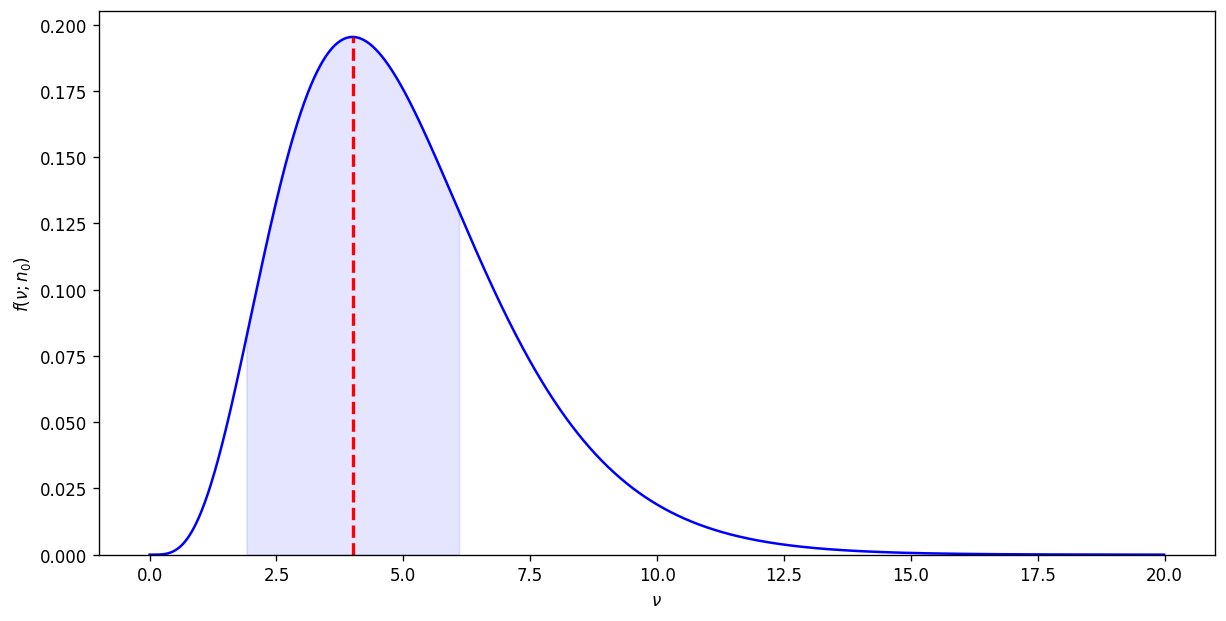

In [15]:
def area(delta):
    return integrate.quad(lambda x: poisson.pmf(n0, x),n0-delta,n0+delta)[0]
alpha=(1-0.6823)
delta=optimize.root(lambda delta: area(delta)-(1-alpha), 0.1).x[0]
s1,s2 = n0-x1,x2-n0
print("ν = {:.2f} ± {:.2f}".format(n0, delta))
print("I = ", 2*delta)
x1, x2 = n0-delta, n0+delta
plt.figure(figsize=(12,6), dpi=120)
plt.plot(x, poisson.pmf(n0, x), color='b')
plt.plot([n0, n0], [0,poisson.pmf(n0, n0)], color='red', linewidth=2, linestyle='--')
x_1s = np.arange(x1, x2+.01, .01)
y_1s = poisson.pmf(n0, x_1s)
plt.fill_between(x_1s, y_1s, alpha=0.1, color='blue')
plt.ylim(bottom=0)
plt.xlabel(r'$\nu$')
plt.ylabel(r'$f(\nu;n_0)$')
plt.show()

### Esercizio 2

* intervallo che abbia la stessa area a sinistra e destra di $\hat{\nu}$, entrambi pari a 68%/2

ν = 4.00 +1.98 / -2.29
I =  4.2741741373846605


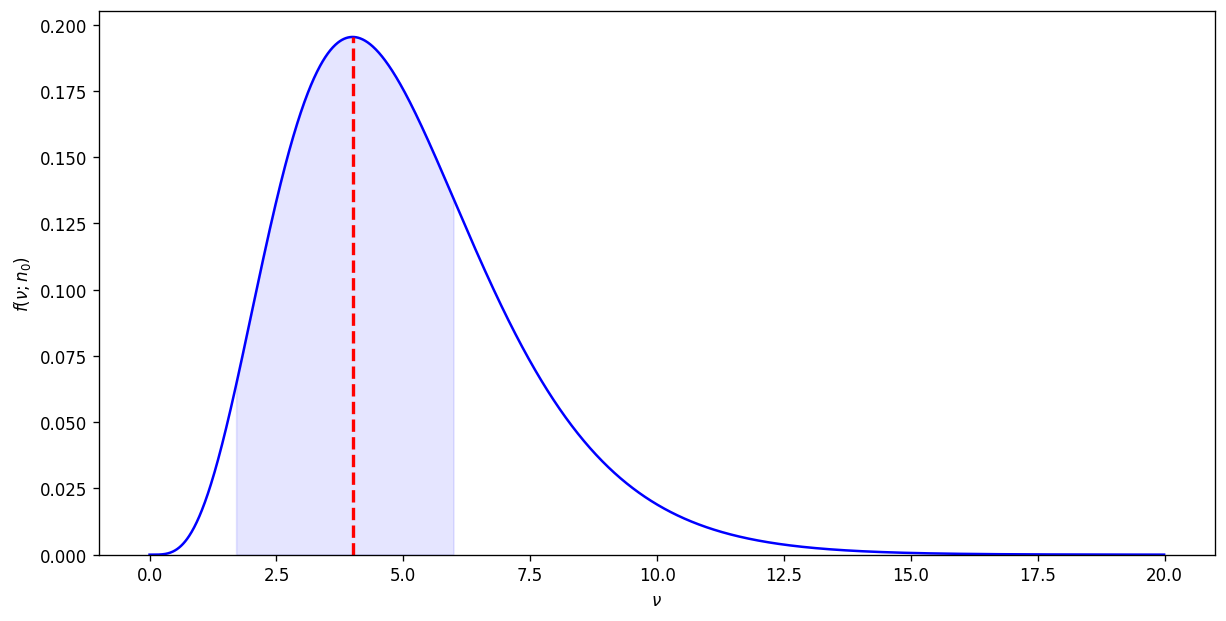

In [16]:
def area1(x1):
    return integrate.quad(lambda x: poisson.pmf(n0, x), x1, n0)[0]
def area2(x2):
    return integrate.quad(lambda x: poisson.pmf(n0, x), n0, x2)[0]
x1 = optimize.root(lambda x: area1(x)-(1-alpha)/2, 0.1).x[0]
x2 = optimize.root(lambda x: area2(x)-(1-alpha)/2, 5).x[0]
s1,s2 = n0-x1,x2-n0
print("ν = {:.2f} +{:.2f} / -{:.2f}".format(n0, s2, s1))
print("I = ", s1+s2)
plt.figure(figsize=(12,6), dpi=120)
plt.plot(x, poisson.pmf(n0, x), color='b')
plt.plot([n0, n0], [0,poisson.pmf(n0, n0)], color='red', linewidth=2, linestyle='--')
x_1s = np.arange(x1, x2+.01, .01)
y_1s = poisson.pmf(n0, x_1s)
plt.fill_between(x_1s, y_1s, alpha=0.1, color='blue')
plt.ylim(bottom=0)
plt.xlabel(r'$\nu$')
plt.ylabel(r'$f(\nu;n_0)$')
plt.show()

### Esercizio 3

* intervallo di larghezza minima corrispondente al 68%

Optimization terminated successfully.
         Current function value: 4.109621
         Iterations: 17
         Function evaluations: 34
ν = 4.00 +2.40 / -1.71
I =  4.109621118660677


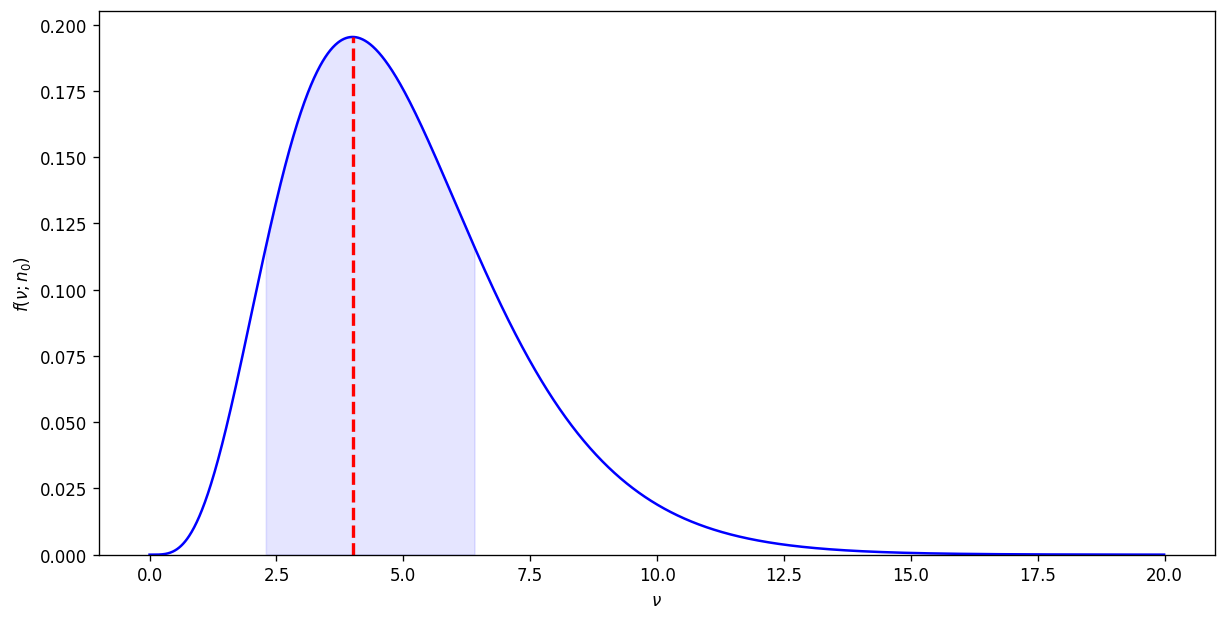

In [17]:
def area(x1, x2):
    return integrate.quad(lambda x: poisson.pmf(n0, x), x1, x2)[0]
def area68(x1):
    x2 = optimize.root(lambda x: area(x1, x)-(1-alpha), n0).x[0]
    return x2
def int68(x1):
    return area68(x1)-x1
def int68min():
    return optimize.fmin(int68, 1)[0]
x1 = int68min()
x2 = area68(x1)
s1,s2 = n0-x1,x2-n0
print("ν = {:.2f} +{:.2f} / -{:.2f}".format(n0, s2, s1))
print("I = ", s1+s2)
plt.figure(figsize=(12,6), dpi=120)
plt.plot(x, poisson.pmf(n0, x), color='b')
plt.plot([n0, n0], [0,poisson.pmf(n0, n0)], color='red', linewidth=2, linestyle='--')
x_1s = np.arange(x1, x2+.01, .01)
y_1s = poisson.pmf(n0, x_1s)
plt.fill_between(x_1s, y_1s, alpha=0.1, color='blue')
plt.ylim(bottom=0)
plt.xlabel(r'$\nu$')
plt.ylabel(r'$f(\nu;n_0)$')
plt.show()

Si può dimostrare che agli estremi dell'intervanno $[x_1, x_2] $ di ampiezza $x_2-x_1$ minima la funzione assume valori uguali: $f(x_1)=f(x_2)$. Assumiamo qui che la funzione sia unimodale, ossia abbia un solo massimo.

Questo perché $x_2$ si può determinare in funzione di $x_1$ imponendo:

$\displaystyle \int_{x_1}^{x_2}\!\!f(x)\,\mathrm{d}x = F(x_2) - F(x_1) = 1-\alpha$

Quindi possiamo scrivere:

$\displaystyle x_1\mapsto x_2(x_1): \int_{x_1}^{x_2}\!\!f(x)\,\mathrm{d}x = 1-\alpha$

Se l'ampiezza dell'intervallo $x_2(x_1)-x_1$ è minima, derivando rispetto ad $x_1$, che è una variabile "libera", dobbiamo avere zero:

$\displaystyle \frac{\mathrm{d}(x_2(x_1)-x_1)}{\mathrm{d}x_1} = \frac{\mathrm{d}x_2(x_1)}{\mathrm{d}x_1}-1 = 0$

Quindi:

$\displaystyle  \frac{\mathrm{d}x_2(x_1)}{\mathrm{d}x_1}=1$

D'altra parte, abbiamo:


$\displaystyle \frac{\mathrm{d}}{\mathrm{d}x_1}\int_{x_1}^{x_2(x_1)}\!\!\!\!f(x)\,\mathrm{d}x = \frac{\mathrm{d}}{\mathrm{d}x_1}(1-\alpha) = 0$

Da cui:


$\displaystyle 0 = \frac{\mathrm{d}F(x_2(x_1))}{\mathrm{d}x_1} - \frac{\mathrm{d}F(x_1)}{\mathrm{d}x_1} = 
\frac{\mathrm{d}F(x_2)}{\mathrm{d}x_2} \frac{\mathrm{d}x_2(x_1)}{\mathrm{d}x_1}- f(x_1) = f(x_2)\cdot 1 - f(x_1)
$

Quindi otteniamo:

$f(x_2) = f(x_1)$

L'intevallo più piccolo corrispondente ad una data probabilità $1-\alpha$ si può quindi calcolare risolvendo il sistema:

$\displaystyle
\left\{
\begin{array}{l}
F(x_2) - F(x_1) = 1-\alpha\\
f(x_2) = f(x_1)
\end{array}
\right.
$

Come corollario, in una PDF simmetrica l'intevallo più breve è simmetrico intorno al valore mediano.

Questo risultato è riportato anche [qui](https://www.johndcook.com/blog/2009/02/23/finding-shortest-confidence-interval/).

### Esercizio 4

* intervallo completamente sinistro con probabilità corrispondente al 90%. L'estremo destro prenderà il nome di *limite superiore* al 90% di credibilità

ν < 7.99, 90% CI


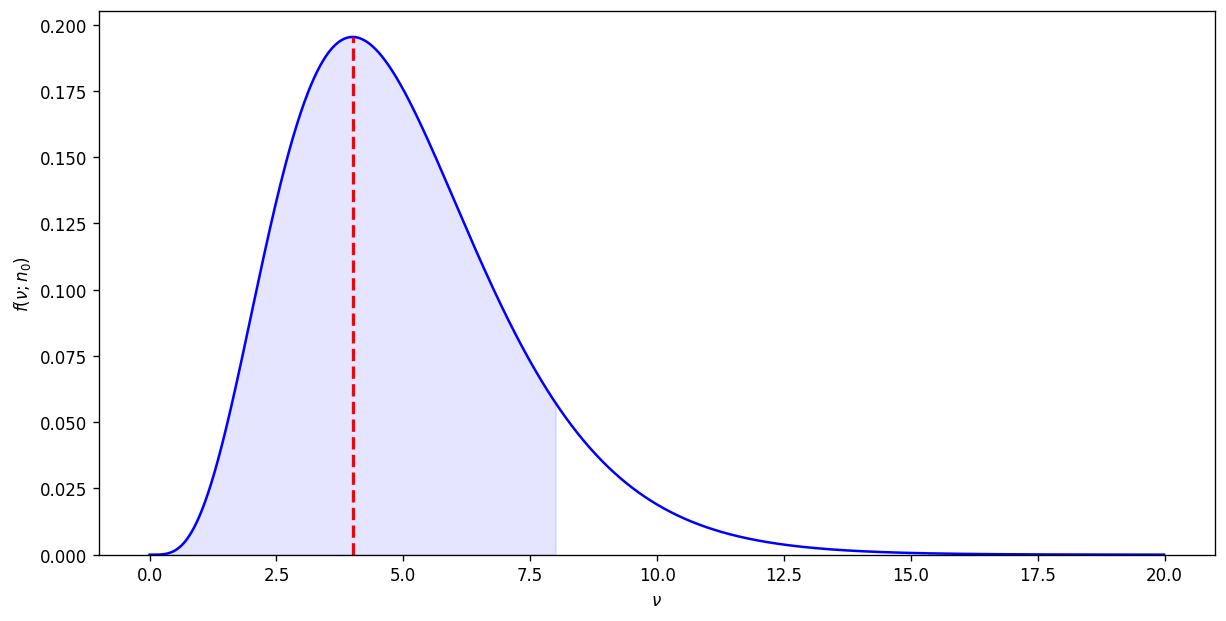

In [18]:
def area_minus(x2): 
    return integrate.quad(lambda x: poisson.pmf(n0, x), 0, x2)[0]
x2 = optimize.root(lambda x: area_minus(x)-0.9, n0).x[0]
print("ν < {:.2f}, 90% CI".format(x2))
x1 = 0
plt.figure(figsize=(12,6), dpi=120)
plt.plot(x, poisson.pmf(n0, x), color='b')
plt.plot([n0, n0], [0,poisson.pmf(n0, n0)], color='red', linewidth=2, linestyle='--')
x_1s = np.arange(x1, x2+.01, .01)
y_1s = poisson.pmf(n0, x_1s)
plt.fill_between(x_1s, y_1s, alpha=0.1, color='blue')
plt.ylim(bottom=0)
plt.xlabel(r'$\nu$')
plt.ylabel(r'$f(\nu;n_0)$')
plt.show()

### Esercizio 5

* intervallo completamente destro con probabilità corrispondente al 90%. L'estremo sinistro prenderà il nome di *limite inferiore* al 90% di credibilità

ν > 2.43, 90% CI


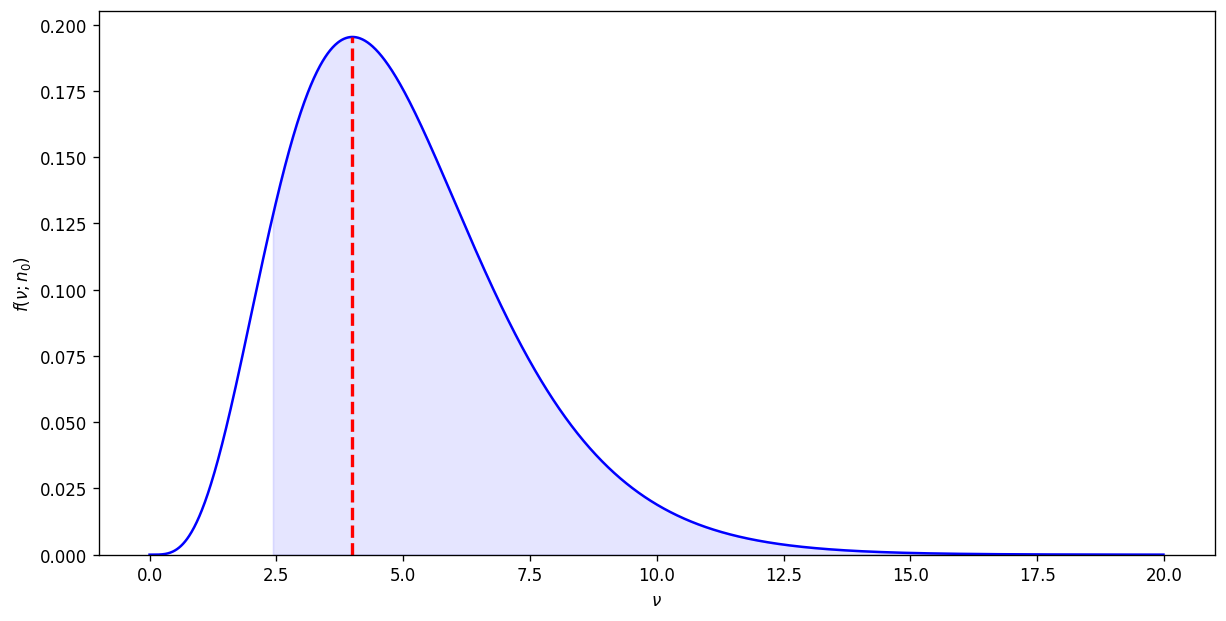

In [19]:
def area_plus(x1): 
    return integrate.quad(lambda x: poisson.pmf(n0, x), x1, 20)[0]
x1 = optimize.root(lambda x: area_plus(x)-0.9, n0).x[0]
print("ν > {:.2f}, 90% CI".format(x1))
x2 = 20
plt.figure(figsize=(12,6), dpi=120)
plt.plot(x, poisson.pmf(n0, x), color='b')
plt.plot([n0, n0], [0,poisson.pmf(n0, n0)], color='red', linewidth=2, linestyle='--')
x_1s = np.arange(x1, x2+.01, .01)
y_1s = poisson.pmf(n0, x_1s)
plt.fill_between(x_1s, y_1s, alpha=0.1, color='blue')
plt.ylim(bottom=0)
plt.xlabel(r'$\nu$')
plt.ylabel(r'$f(\nu;n_0)$')
plt.show()

### Esercizio 6

* Trovare la PDF a posteriori per il parametro $\lambda$ una distribuzione esponenziale osservando $x=x_0=3.0$

$\displaystyle f(x;\lambda) = \lambda e^{-\lambda x}$

$\displaystyle p(\lambda;x_0) = \frac{f(x_0;\lambda)\,\pi(\lambda)}{\int f(x_0;\lambda^\prime)\,\pi(\lambda^\prime) \,\mathrm{d}\lambda^\prime}$

Assumiamo $\pi(\lambda)=\mathrm{const}$.

$\displaystyle p(\lambda;x_0) = x_0^2 \lambda e^{-\lambda x_0}$

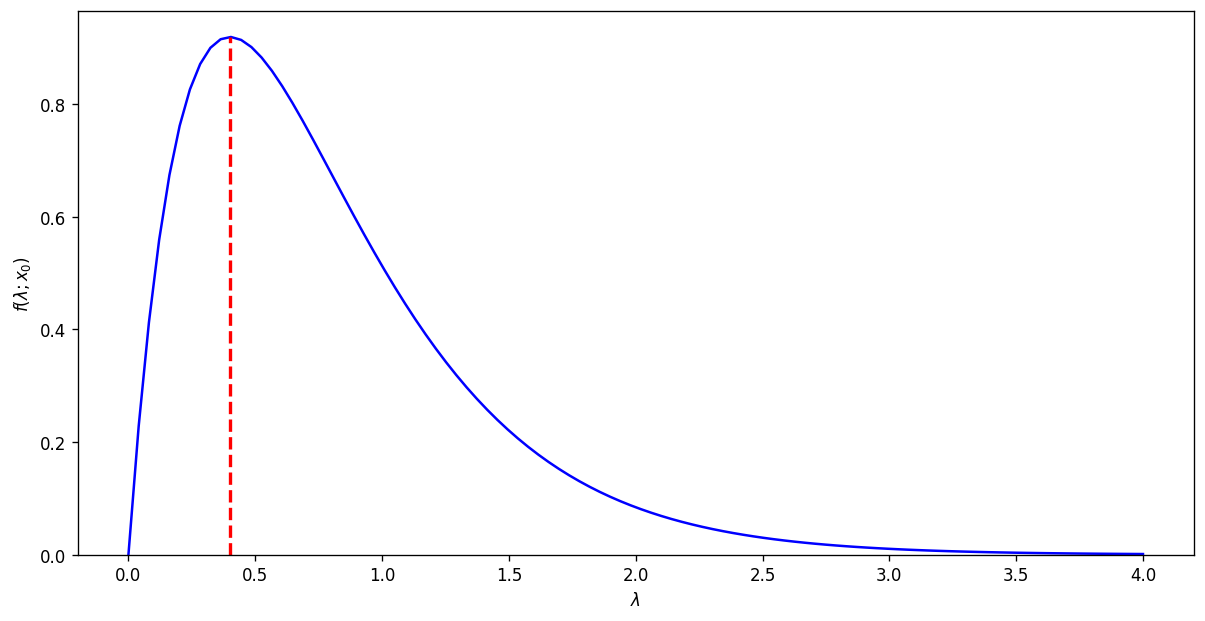

In [20]:
from scipy.stats import gamma
x0 = 2.5
lams = np.linspace(0, 4, 100)
l0 = 1/x0
y = gamma.pdf(lams, 2, scale=1/x0)
plt.figure(figsize=(12,6), dpi=120)
plt.plot(lams, y, color='b')
plt.plot([l0, l0], [0,gamma.pdf(l0, 2, scale=1/x0)], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$f(\lambda;x_0)$')
plt.show()

### Esercizio 7

* Trovare la PDF a posteriori per il parametro $p$ di una distribuzione binomiale. In particolare, considerare anche il caso con $N=10$ e valore osservato $n=n_0=10$. <span style="color: blue">Questo esercizio è molto importante per la scelta di un acquisto su un sito di vendita online: **conviene scegliere chi ha il 100% di feedback positivi, o chi ha il 99.56%?**</span>

$\displaystyle p(n; p, N) = \left(
\begin{array}{c}
N \\
n
\end{array}
\right) p^n(1-p)^{N-n} =
\frac{N!}{n!{(N-n)}!}p^n(1-p)^{N-n}
$

$\displaystyle p(p;n_0) = \frac{p(n_0;p, N)\,\pi(p)}{\int p(n_0;p^\prime, N)\,\pi(p^\prime) \,\mathrm{d} p^\prime}$

Assumiamo $\pi(p)=\mathrm{const}$.

$\displaystyle p(p;n_0) = C p^{n_0}(1-p)^{N-n_0}$

$C$ è dato da:

$\displaystyle C^{-1} = \int_0^1\!\! p^{n_0}(1-p)^{N-n_0}\,\mathrm{d}p$

Questa così ottenuta è una distribuzione [beta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html).

In [21]:
# calcolo esplicito con integrazione numerica
n0, N= 8, 10
norm = 1
def post(p):
    return norm * p**n0*(1-p)**(N-n0)
norm = 1/integrate.quad(post, 0, 1)[0]

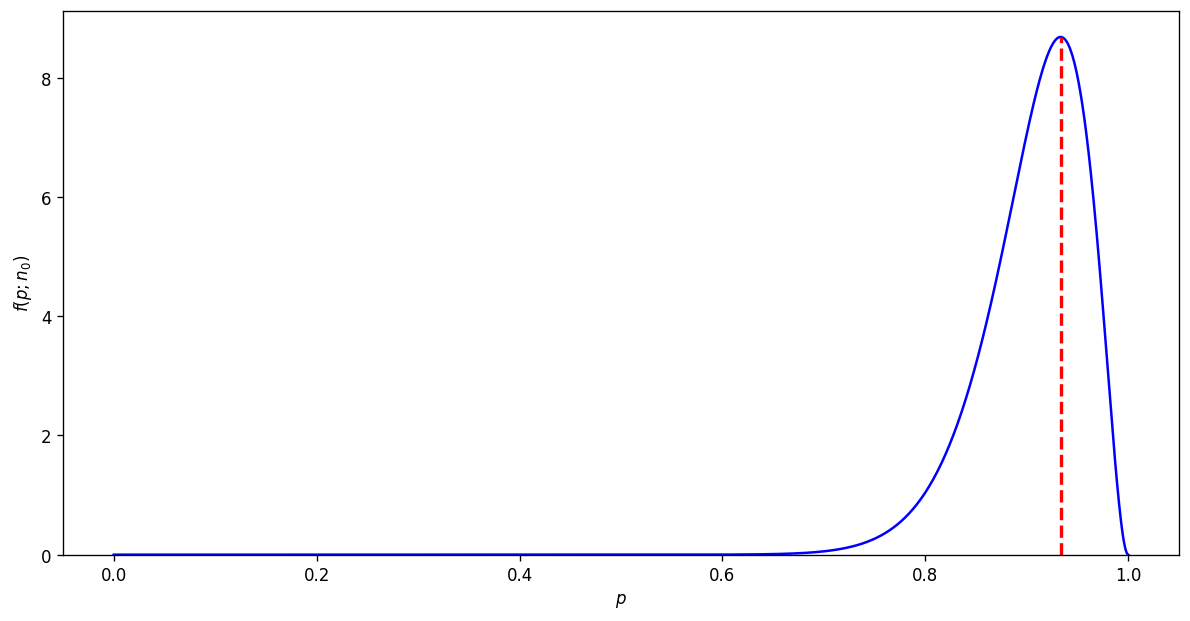

In [26]:
from scipy.stats import beta
n0, N = 28, 30
ps = np.linspace(0, 1, 1000)
p0 = n0/N
#y = np.vectorize(post)(ps)
y = beta.pdf(ps, n0+1, N-n0+1)
plt.figure(figsize=(12,6), dpi=120)
plt.plot(ps, y, color='b')
plt.plot([p0, p0], [0, beta.pdf(p0, n0+1, N-n0+1)], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel(r'$p$')
plt.ylabel(r'$f(p;n_0)$')
plt.show()